In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Load the Iris dataset
iris = load_iris()

In [ ]:
#Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns=iris['feature_names'] + ['target'])
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [ ]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
#Prepare the data
X = iris.data  # Input features
y = iris.target  # Target labels

In [ ]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()

In [ ]:
#Train the model
model.fit(X_train, y_train)


SVC()

In [ ]:
#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#Make predictions
new_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8], [7.3, 2.9, 6.3, 1.8]])
predicted_labels = model.predict(new_data)
print("Predicted labels for new data:")
print(predicted_labels)

Predicted labels for new data:
[0 2 2]


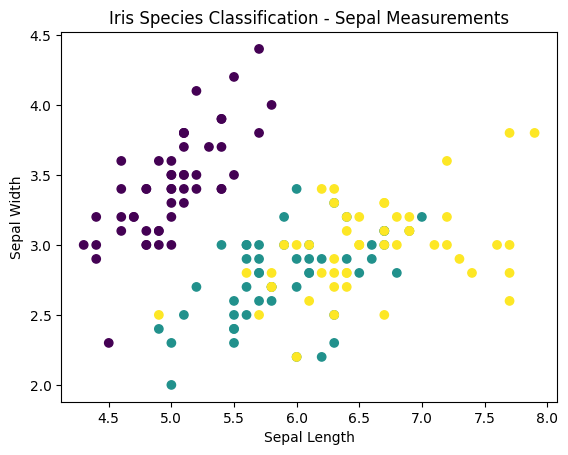

In [ ]:
#Visualize the scatter plot of sepal length vs. sepal width
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Species Classification - Sepal Measurements')
plt.show()

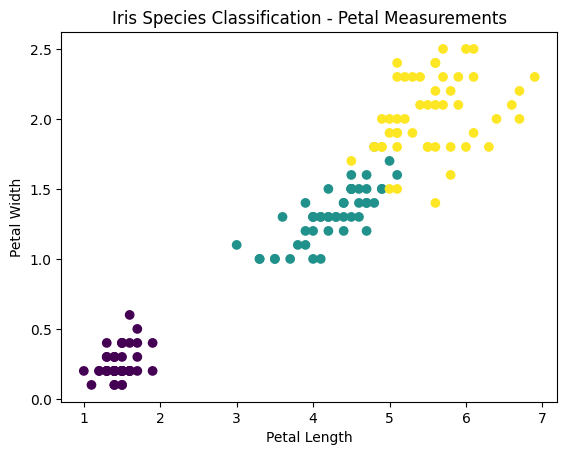

In [ ]:
#Visualize the scatter plot of petal length vs. petal width
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Species Classification - Petal Measurements')
plt.show()
sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

In [ ]:
new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
predicted_label = model.predict(new_data)
predicted_species = iris.target_names[predicted_label[0]]

In [ ]:
print("Predicted species:", predicted_species)
import seaborn as sns


Predicted species: setosa


In [ ]:
#Load the Iris dataset
iris = sns.load_dataset("iris")

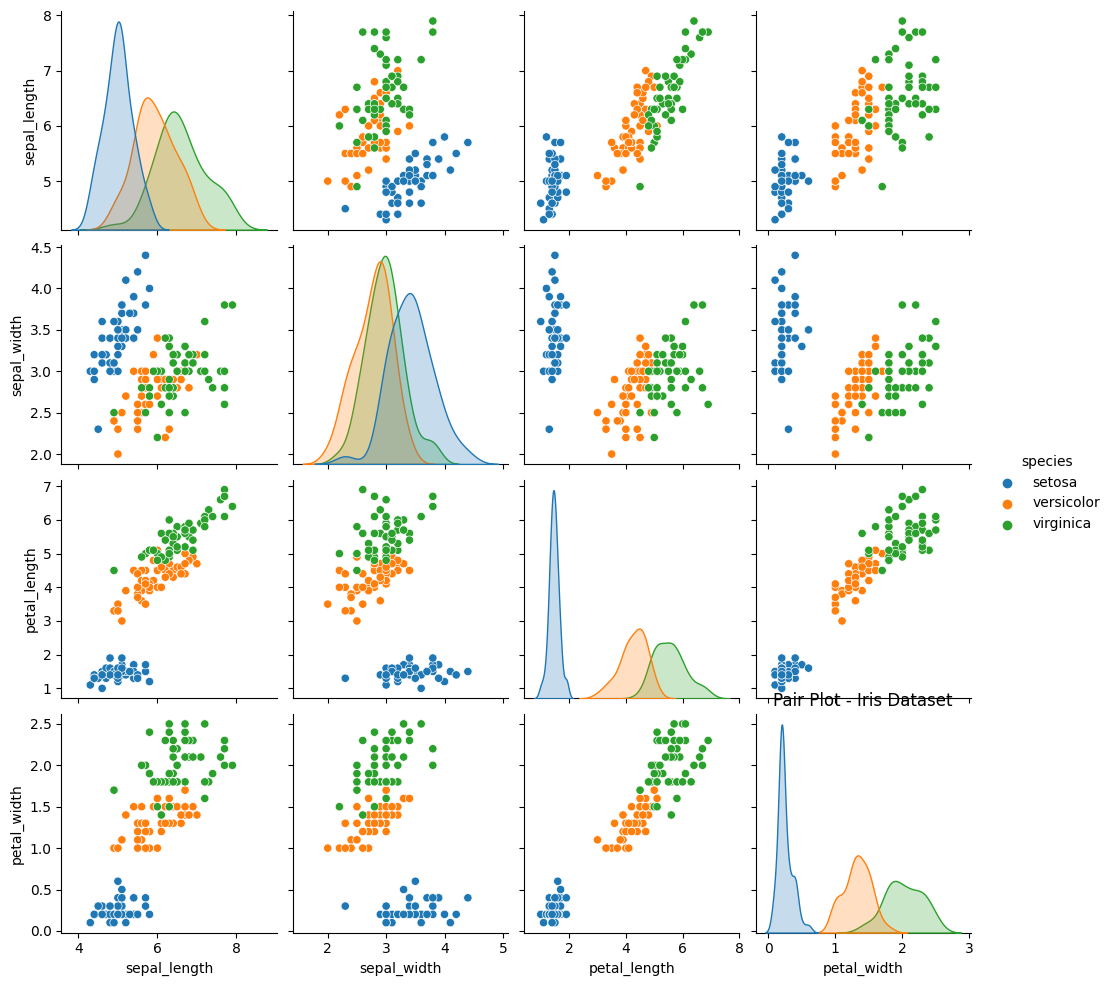

In [ ]:

#Create a pair plot
sns.pairplot(iris, hue="species")
plt.title("Pair Plot - Iris Dataset")
plt.show()


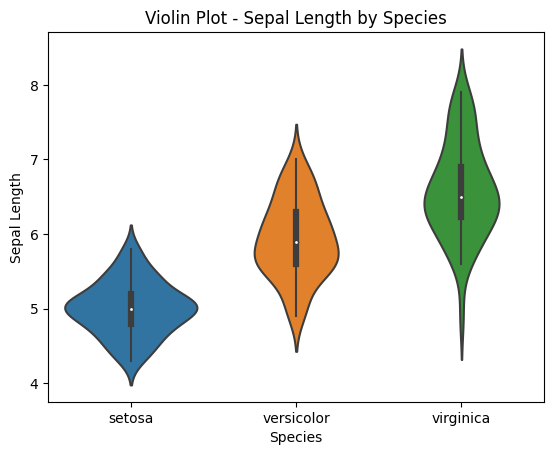

In [ ]:
# Create a violin plot
sns.violinplot(x="species", y="sepal_length", data=iris)
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.title("Violin Plot - Sepal Length by Species")
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = iris.corr()

<ipython-input-16-b27afd4d9f70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


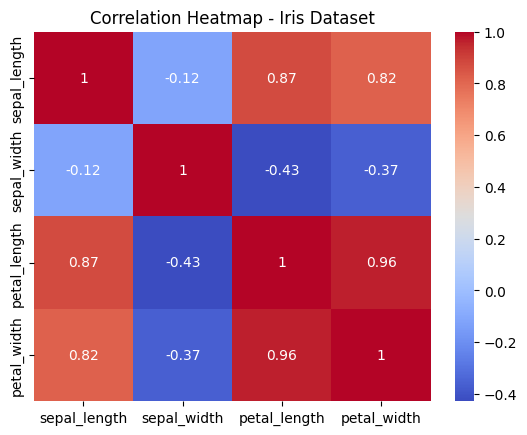

In [ ]:
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Iris Dataset")
plt.show()


In [ ]:
from pandas.plotting import parallel_coordinates

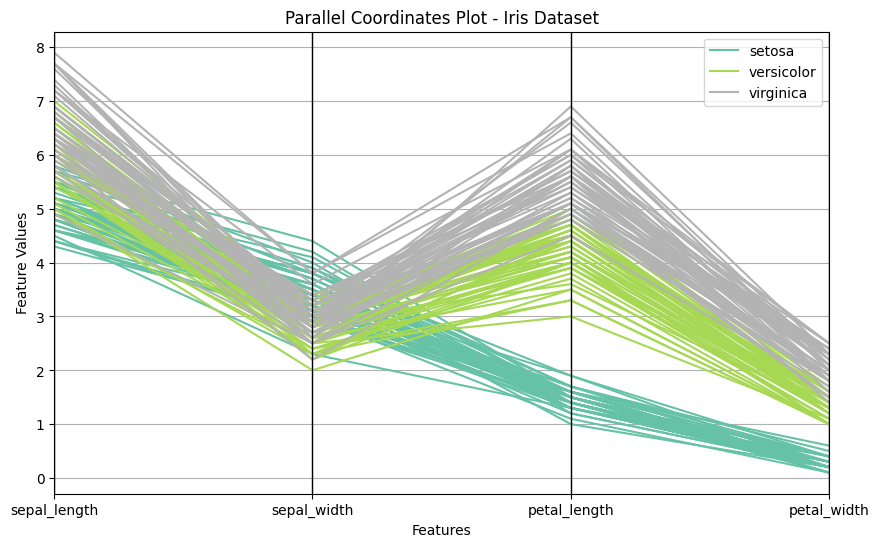

In [ ]:
# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(iris, "species", colormap=plt.get_cmap("Set2"))
plt.title("Parallel Coordinates Plot - Iris Dataset")
plt.xlabel("Features")
plt.ylabel("Feature Values")
plt.legend(loc="upper right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris


In [ ]:
# Load the Iris dataset
iris = load_iris()

In [ ]:
# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]


In [ ]:
# Filter and print details of the "setosa" species
setosa_details = iris_df[iris_df['species'] == 'setosa']
print(setosa_details)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
# Load the Iris dataset
iris = load_iris()

In [ ]:
# Filter the dataset for the "setosa" species
setosa_data = iris.data[iris.target == 0]
setosa_features = iris.feature_names


In [ ]:
# Convert the filtered data to a pandas DataFrame
setosa_df = pd.DataFrame(data=setosa_data, columns=setosa_features)


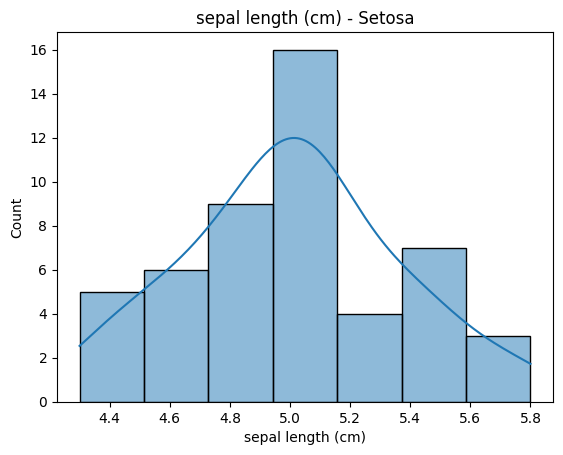

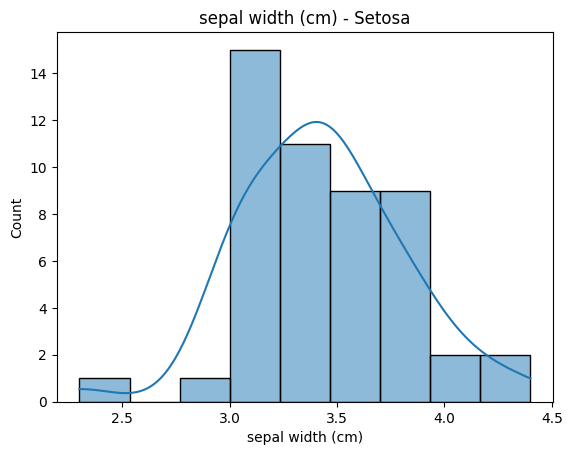

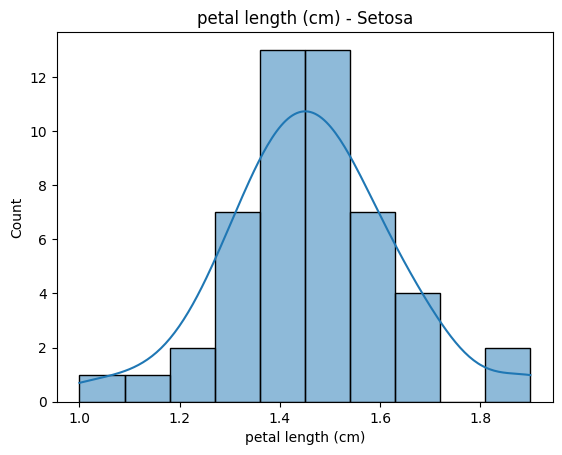

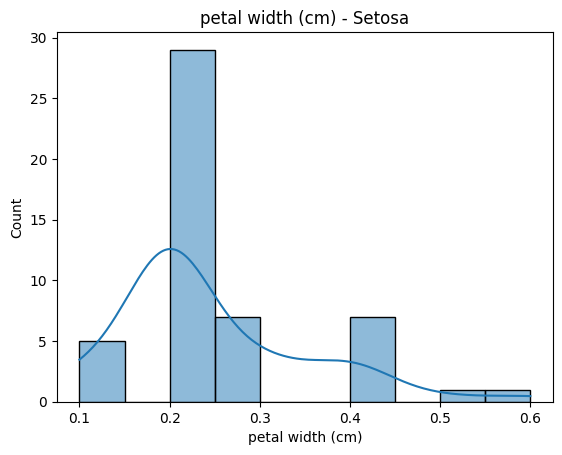

In [ ]:
# Create visualizations for the "setosa" species
for feature in setosa_features:
    plt.figure()
    sns.histplot(setosa_df[feature], kde=True)
    plt.title(f"{feature} - Setosa")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
# Load the Iris dataset
iris = load_iris()

In [ ]:
# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

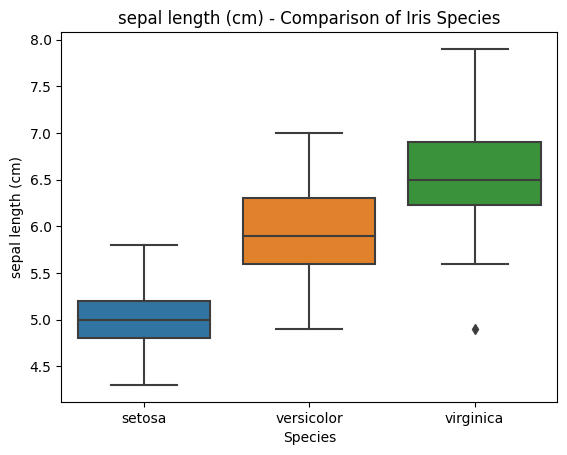

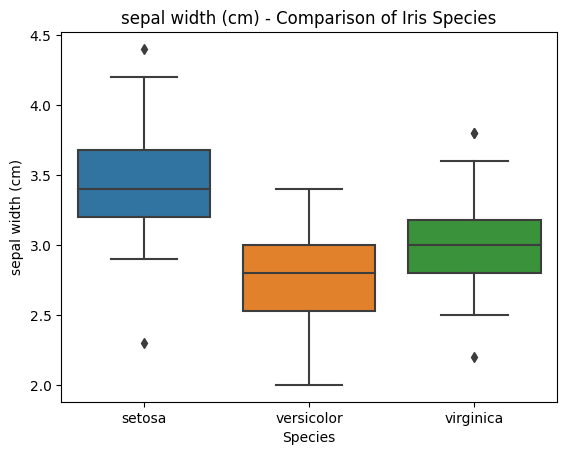

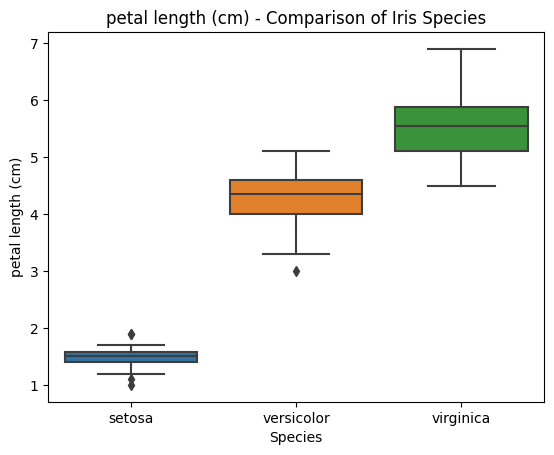

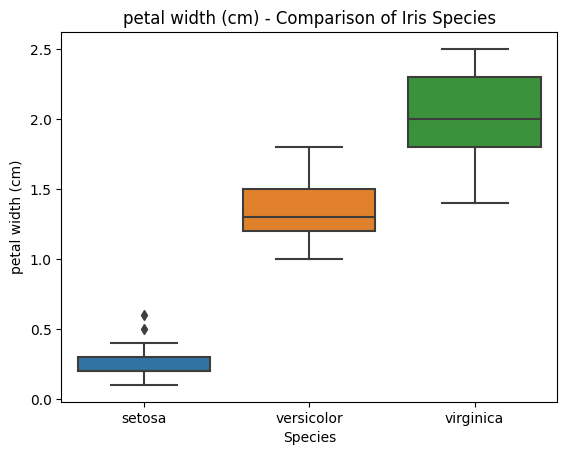

In [ ]:
# Create box plots for each feature comparing the three species
for feature in iris.feature_names:
    plt.figure()
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f"{feature} - Comparison of Iris Species")
    plt.xlabel("Species")
    plt.ylabel(feature)
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
# Load the Iris dataset
iris = load_iris()


In [ ]:
# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [ ]:
# Count the number of occurrences of each species
species_counts = iris_df['species'].value_counts()


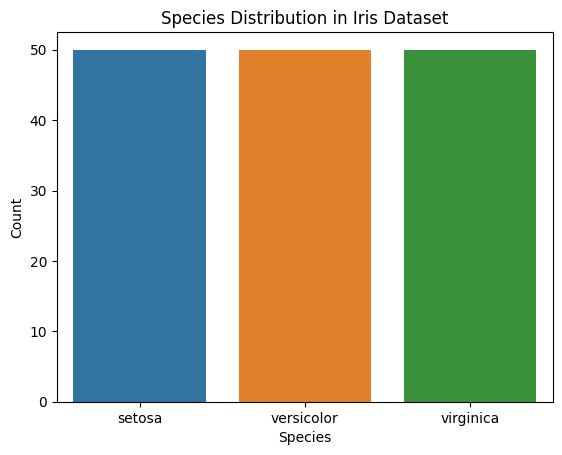

In [ ]:
# Create a bar plot to visualize the species distribution
plt.figure()
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title("Species Distribution in Iris Dataset")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()